In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
customer_df= pd.read_excel(r"C:\Users\KABI\OneDrive\Documents\UNIFIED MENTOR INTERN\budget_sales_project\AdventureWorks_Database.xlsx",'Customers',
                        dtype = {'CustomerKey': str},
                        parse_dates = ['BirthDate','DateFirstPurchase']  )
customer_df.head()

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles


In [3]:
product_df= pd.read_excel(r"C:\Users\KABI\OneDrive\Documents\UNIFIED MENTOR INTERN\budget_sales_project\AdventureWorks_Database.xlsx",'Product',
                        dtype = {'ProductKey': str},
                        parse_dates = ['StartDate'])
product_df.head()

product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ProductKey          606 non-null    object        
 1   ProductName         606 non-null    object        
 2   SubCategory         397 non-null    object        
 3   Category            397 non-null    object        
 4   StandardCost        395 non-null    float64       
 5   Color               352 non-null    object        
 6   ListPrice           395 non-null    float64       
 7   DaysToManufacture   606 non-null    int64         
 8   ProductLine         380 non-null    object        
 9   ModelName           397 non-null    object        
 10  Photo               606 non-null    object        
 11  ProductDescription  396 non-null    object        
 12  StartDate           606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object

In [4]:
sales_df= pd.read_excel(r"C:\Users\KABI\OneDrive\Documents\UNIFIED MENTOR INTERN\budget_sales_project\AdventureWorks_Database.xlsx",'Sales',
                       dtype= {'ProductKey':str,'CustomerKey':str,'PromotionKey':str,'SalesTerritoryKey':str},
                       parse_dates=['OrderDate','ShipDate'])

sales_df['DateKey']= sales_df['OrderDate'].astype(str)

sales_df.head()




,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost,List Price,Unnamed: 22,diif std cost,diff list price,DateKey
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.2700,286.2616,NaN,NaN,3578.2700,0.0,NaN,-764.3184,NaN,2171.2942,3578.2700,NaN,0,0,2014-01-01
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,1912.1544,3399.9900,271.9992,NaN,NaN,3399.9900,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,1912.1544,3399.9900,271.9992,NaN,NaN,3399.9900,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,413.1463,699.0982,55.9279,NaN,NaN,699.0982,0.0,NaN,-127.1944,NaN,413.1463,699.0982,NaN,0,0,2014-01-01
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,1912.1544,3399.9900,271.9992,NaN,NaN,3399.9900,0.0,NaN,-424.3188,NaN,1912.1544,3399.9900,NaN,0,0,2014-01-01


In [5]:
territory_df = pd.read_excel(r"C:\Users\KABI\OneDrive\Documents\UNIFIED MENTOR INTERN\budget_sales_project\AdventureWorks_Database.xlsx",'Territory',
                       dtype={'SalesTerritoryKey':str},
                            )
territory_df.head()

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


# Merging the datas

In [6]:
df1 = pd.merge(sales_df,product_df, on = 'ProductKey',how='inner')

df2 = pd.merge(df1,customer_df, on = 'CustomerKey', how = 'inner')

df = pd.merge(df2,territory_df, on = 'SalesTerritoryKey', how = 'inner')

df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost_x,List Price,Unnamed: 22,diif std cost,diff list price,DateKey,ProductName,SubCategory,Category,StandardCost_y,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,NaN,NaN,3578.27,0.0,NaN,-764.3184,NaN,2171.2942,3578.27,NaN,0,0,2014-01-01,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,294.5797,539.99,43.1992,NaN,NaN,539.99,0.0,NaN,245.4103,NaN,294.5797,539.99,NaN,0,0,2016-04-16,"Mountain-500 Black, 52",Mountain Bikes,Bikes,294.5797,Black,539.99,4,Mountain,Mountain-500,http://www.avising.com/me/LearnPBI/DataSources...,"Suitable for any type of riding, on or off-roa...",2007-07-01,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,NaN,NaN,3578.27,0.0,NaN,-5106.9068,NaN,2171.2942,3578.27,NaN,0,0,2014-01-30,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,479,2016-11-29,2016-12-05,21727,1,6,SO71614,2,1,8.9900,3.3623,8.99,0.7192,NaN,NaN,8.99,0.0,NaN,5.6277,NaN,3.3623,8.99,NaN,0,0,2016-11-29,Road Bottle Cage,Bottles and Cages,Accessories,3.3623,NaN,8.99,0,Road,Road Bottle Cage,http://www.avising.com/me/LearnPBI/DataSources...,Aluminum cage is lighter than our mountain ver...,2007-07-01,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,477,2016-11-29,2016-12-05,21727,1,6,SO71614,3,1,4.9900,1.8663,4.99,0.3992,NaN,NaN,4.99,0.0,NaN,3.1237,NaN,1.8663,4.99,NaN,0,0,2016-11-29,Water Bottle - 30 oz.,Bottles and Cages,Accessories,1.8663,NaN,4.99,0,Sport,Water Bottle,http://www.avising.com/me/LearnPBI/DataSources...,AWC logo water bottle - holds 30 oz; leak-proof.,2007-07-01,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [8]:
df.shape

(58189, 58)

In [9]:
df.describe()

,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost_x,List Price,Unnamed: 22,diif std cost,diff list price,StandardCost_y,ListPrice,DaysToManufacture,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned
count,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,0.0,0.0,58189.000000,58189.000000,0.0,58189.000000,0.0,58189.000000,58189.000000,0.0,58189.0,58189.0,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000
mean,1.887453,1.569386,413.888218,296.539185,503.666270,40.293303,NaN,NaN,503.666269,0.000001,NaN,38.398254,NaN,296.539185,503.666270,NaN,0.0,0.0,296.539185,503.666270,1.045215,59769.887779,1.838921,1.073502,0.690560,1.502466
std,1.018829,1.047532,833.052938,560.171436,941.462817,75.317027,NaN,NaN,941.462815,0.000014,NaN,667.349417,NaN,560.171436,941.462817,NaN,0.0,0.0,560.171436,941.462817,1.757395,33128.041818,1.614467,1.580055,0.462267,1.155496
min,1.000000,1.000000,0.572500,0.856500,2.290000,0.183200,NaN,NaN,2.290000,0.000000,NaN,-5106.906800,NaN,0.856500,2.290000,NaN,0.0,0.0,0.856500,2.290000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.990000,3.362300,8.990000,0.719200,NaN,NaN,8.990000,0.000000,NaN,1.433500,NaN,3.362300,8.990000,NaN,0.0,0.0,3.362300,8.990000,0.000000,30000.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,24.490000,12.192400,32.600000,2.608000,NaN,NaN,32.600000,0.000000,NaN,6.253700,NaN,12.192400,32.600000,NaN,0.0,0.0,12.192400,32.600000,0.000000,60000.000000,2.000000,0.000000,1.000000,2.000000
75%,2.000000,2.000000,269.995000,343.649600,539.990000,43.199200,NaN,NaN,539.990000,0.000000,NaN,21.903700,NaN,343.649600,539.990000,NaN,0.0,0.0,343.649600,539.990000,4.000000,80000.000000,3.000000,2.000000,1.000000,2.000000
max,8.000000,4.000000,3578.270000,2171.294200,3578.270000,286.261600,NaN,NaN,3578.270000,0.000300,NaN,1487.835600,NaN,2171.294200,3578.270000,NaN,0.0,0.0,2171.294200,3578.270000,4.000000,170000.000000,5.000000,5.000000,1.000000,4.000000


In [123]:
df.isnull().sum()

ProductKey      0
OrderDate       0
ShipDate        0
CustomerKey     0
PromotionKey    0
               ..
profit          0
time_diff       0
Age             0
Age_category    0
Total           0
Length: 70, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#drop the null values

In [13]:
df.isnull().sum()

ProductKey                  0
OrderDate                   0
ShipDate                    0
CustomerKey                 0
PromotionKey                0
SalesTerritoryKey           0
SalesOrderNumber            0
SalesOrderLineNumber        0
OrderQuantity               0
UnitPrice                   0
TotalProductCost            0
SalesAmount                 0
TaxAmt                      0
Unnamed: 13             58189
Unnamed: 14             58189
Unnamed: 15                 0
Unnamed: 16                 0
Unnamed: 17             58189
Unnamed: 18                 0
Unnamed: 19             58189
StandardCost_x              0
List Price                  0
Unnamed: 22             58189
diif std cost               0
diff list price             0
DateKey                     0
ProductName                 0
SubCategory                 0
Category                    0
StandardCost_y              0
Color                   27442
ListPrice                   0
DaysToManufacture           0
ProductLin

In [14]:
df['Color'].fillna(df['Color'].mode(),inplace=True)

In [15]:
objects = df.select_dtypes(include = 'object')
numbers = df.select_dtypes(include = 'number')
print(objects)
print(numbers)

      ProductKey CustomerKey PromotionKey SalesTerritoryKey SalesOrderNumber  \
0            310       21768            1                 6          SO43697   
1            600       21768            1                 6          SO56212   
2            310       21727            1                 6          SO43833   
3            479       21727            1                 6          SO71614   
4            477       21727            1                 6          SO71614   
...          ...         ...          ...               ...              ...   
58184        528       13145            1                 2          SO70064   
58185        361       13145            1                 2          SO70064   
58186        480       13145            1                 2          SO70064   
58187        530       27040            1                 2          SO52124   
58188        480       27040            2                 2          SO52124   

          DateKey             ProductNa

# Feature engineering

In [17]:
df['sales_year']= df['OrderDate'].dt.year

In [18]:
df['sales_month'] = df['OrderDate'].dt.month

In [19]:
df['sales_day'] = df['OrderDate'].dt.day

In [20]:
df['sales_week'] = df['OrderDate'].dt.dayofweek

In [21]:
df['sales_day_name'] = df['OrderDate'].dt.day_name()

In [22]:
df['year_month'] = df['OrderDate'].apply(lambda x : x.strftime('%Y-%m'))

In [23]:
df['total_invoice_amnt'] = df['SalesAmount'] + df['TaxAmt']

In [24]:
df['profit'] = (df['UnitPrice']*df['OrderQuantity'])-df['TotalProductCost']

In [25]:
df['ProductName']= df['ProductName'].str.replace(',','-')

In [26]:
df['Category'].unique()

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

In [27]:
df['SubCategory'].unique()

array(['Road Bikes', 'Mountain Bikes', 'Bottles and Cages', 'Gloves',
       'Tires and Tubes', 'Helmets', 'Touring Bikes', 'Jerseys',
       'Cleaners', 'Caps', 'Hydration Packs', 'Socks', 'Fenders', 'Vests',
       'Bike Racks', 'Bike Stands', 'Shorts'], dtype=object)

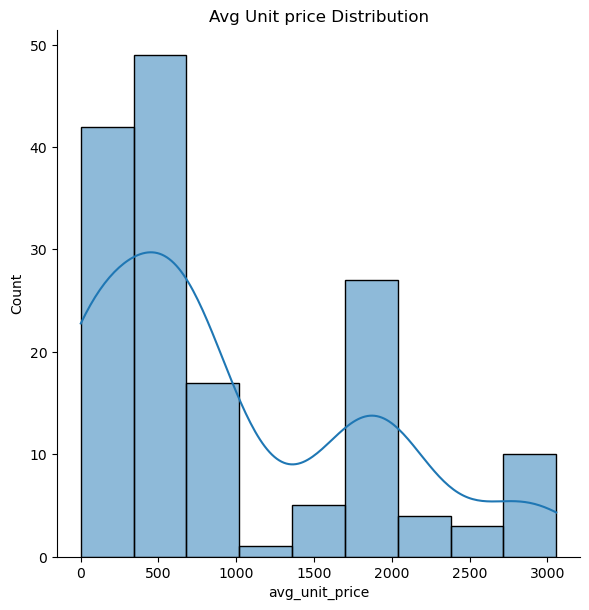

In [28]:
avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()

sns.displot(data = avg_unit_price,height = 6,  kde = True)
plt.title('Avg Unit price Distribution')
plt.xlabel('avg_unit_price')
plt.show()

# aggregate sales across sub-category

<AxesSubplot:xlabel='SubCategory', ylabel='count'>

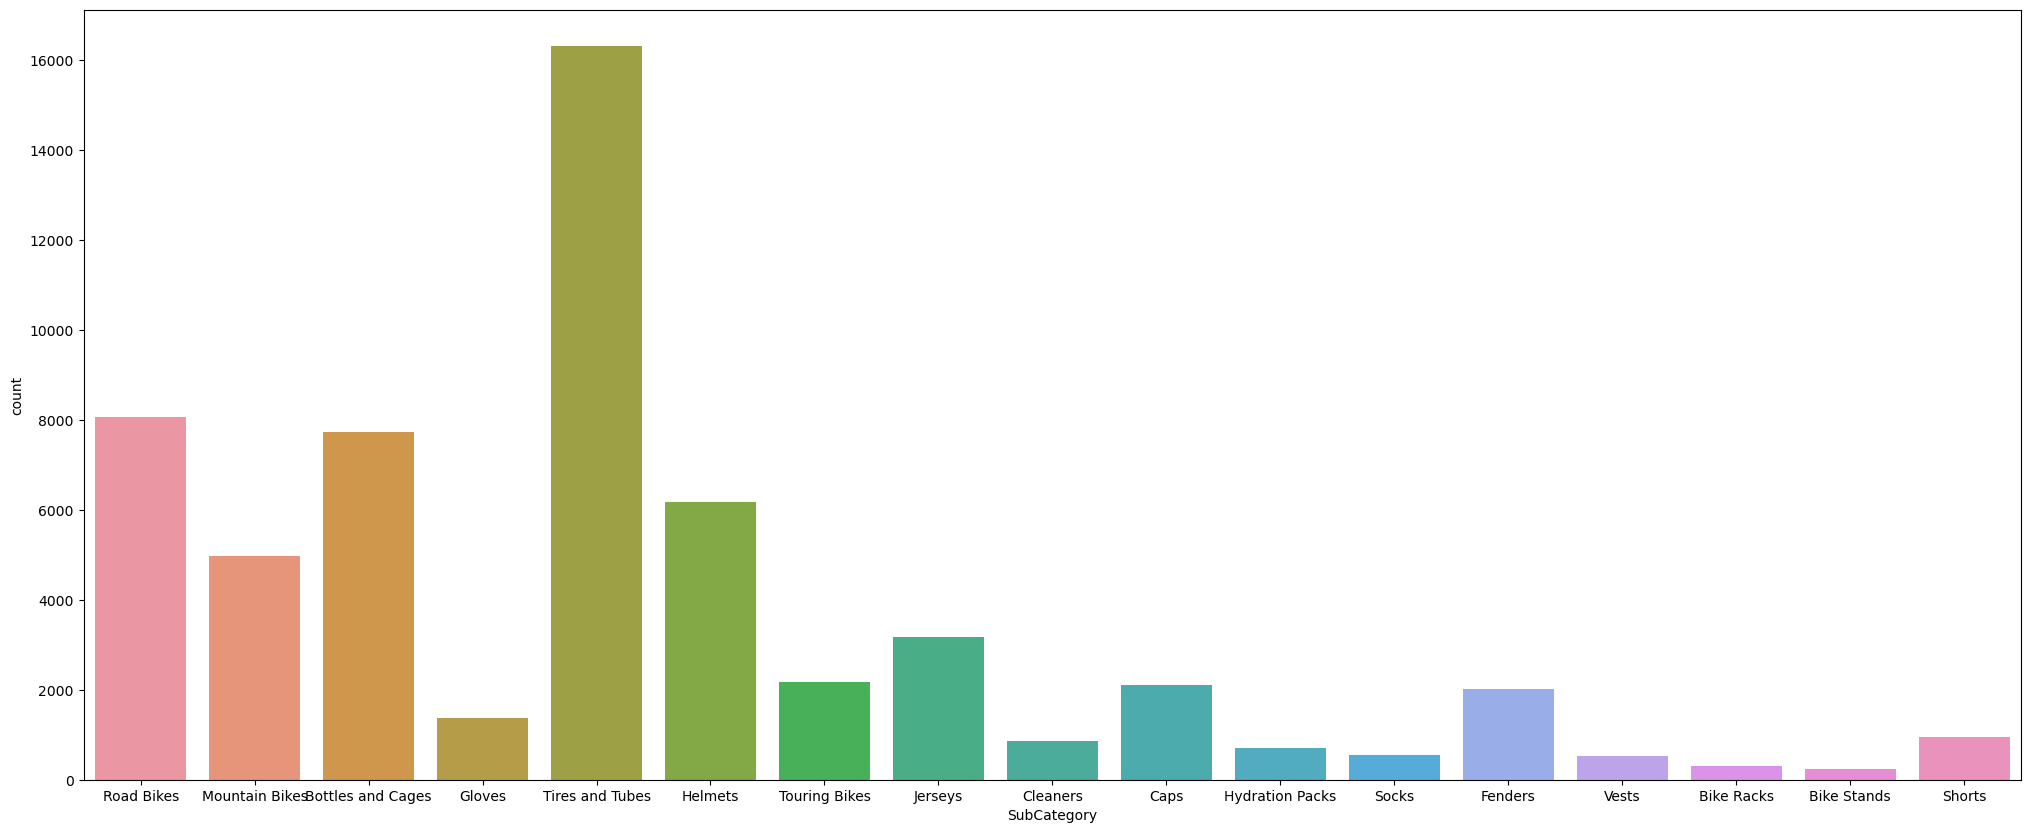

In [30]:
plt.figure(figsize=(25,10))
sns.countplot(df['SubCategory'])

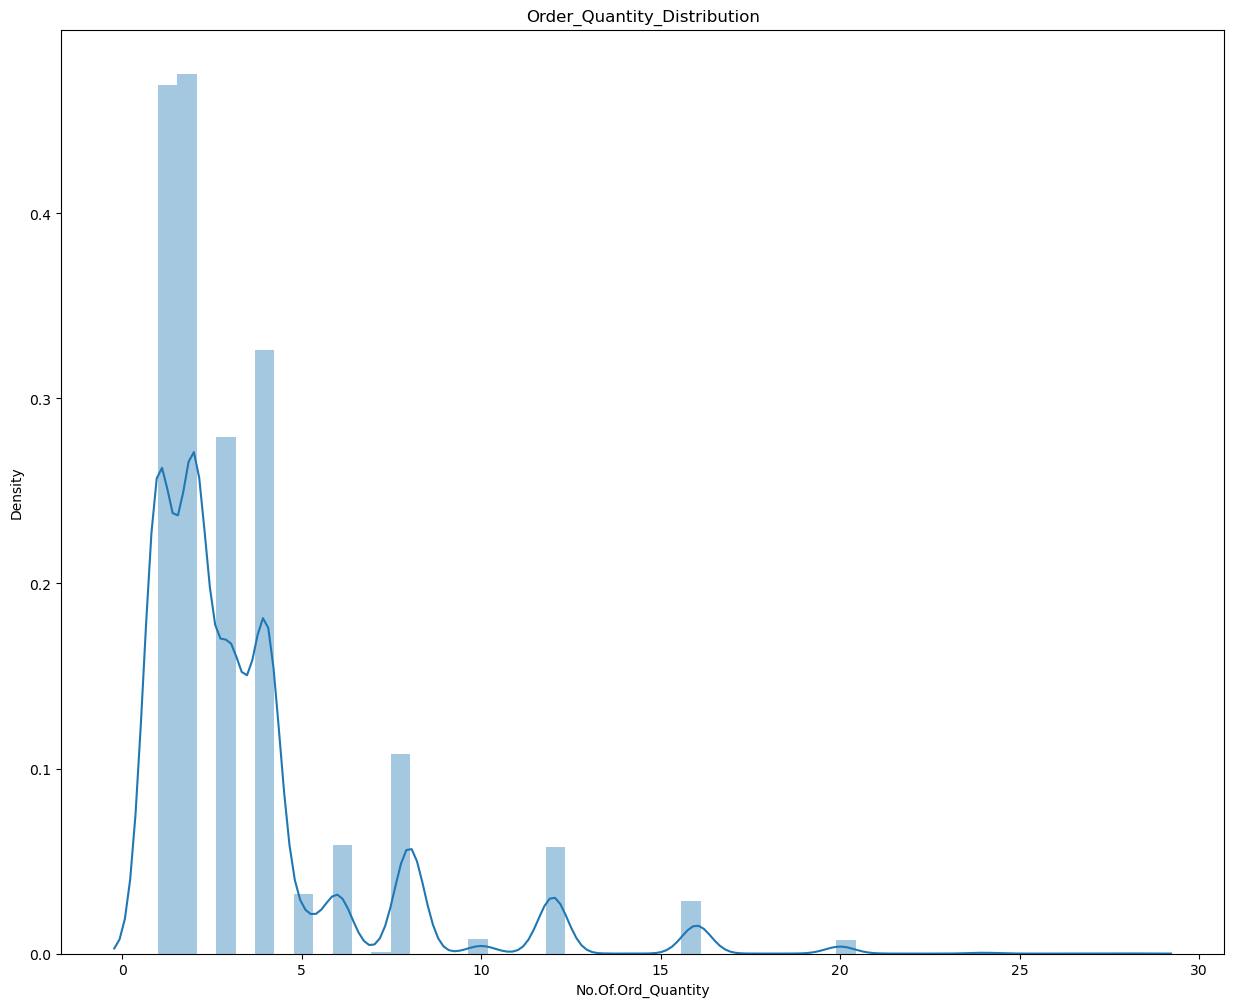

In [31]:
order_quantity = df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()
plt.figure(figsize=(15,12))
sns.distplot(order_quantity,kde = True)
plt.title('Order_Quantity_Distribution')
plt.xlabel('No.Of.Ord_Quantity')
plt.show()

max num of order quantity is below 5

# distribution of sales order line number

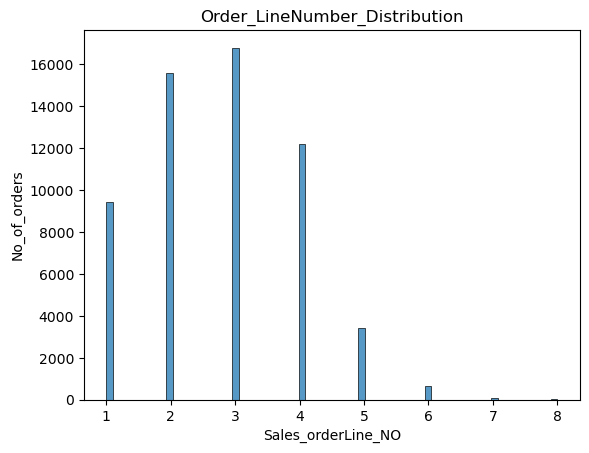

In [34]:
sales_ordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')


sns.histplot(sales_ordernumber)
plt.title('Order_LineNumber_Distribution')
plt.xlabel('Sales_orderLine_NO')
plt.ylabel('No_of_orders')
plt.show()

# sales by region

In [36]:
df.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost_x',
       'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price',
       'DateKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost_y',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate', 'FirstName', 'LastName',
       'FullName', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'DateFirstPurchase', 'CommuteDistance', 'Region', 'Country', 'Group',
       'RegionImage', 'sales_year', 'sale

In [37]:
region_profit = df.groupby(['Region'])['SalesAmount'].sum()
region_profit

Region
Australia         9.051766e+06
Canada            1.966991e+06
Central           3.000830e+03
France            2.640526e+06
Germany           2.890708e+06
Northeast         6.532468e+03
Northwest         3.639701e+06
Southeast         1.212489e+04
Southwest         5.708996e+06
United Kingdom    3.387491e+06
Name: SalesAmount, dtype: float64

In [38]:
region_labels = region_profit.index.to_list()
region_labels

['Australia',
 'Canada',
 'Central',
 'France',
 'Germany',
 'Northeast',
 'Northwest',
 'Southeast',
 'Southwest',
 'United Kingdom']

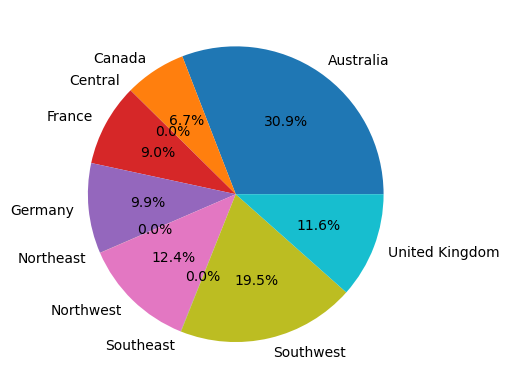

In [39]:
plt.pie(region_profit,labels=region_labels,autopct='%.1f%%')
plt.show()

# highest in Australia and second highest in southwest region

### sales by category

In [41]:
sales_category = df.groupby('Category')['SalesAmount'].sum()

sales_category



Category
Accessories    6.670153e+05
Bikes          2.831814e+07
Clothing       3.226766e+05
Name: SalesAmount, dtype: float64

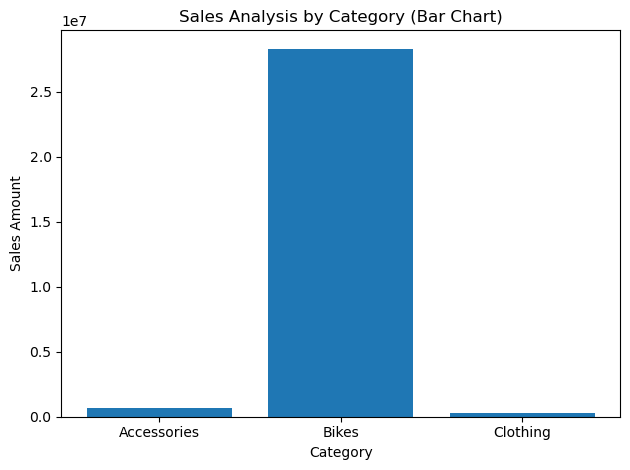

In [42]:
import matplotlib.pyplot as plt

# Extract data from sales_category (assuming it's a pandas Series)
categories = sales_category.index.to_numpy()  # Category labels
sales_amounts = sales_category.to_numpy()  # Sales amounts

# Create a bar chart
plt.bar(categories, sales_amounts)
plt.xlabel("Category")
plt.ylabel("Sales Amount")
plt.title("Sales Analysis by Category (Bar Chart)")
plt.tight_layout()
plt.show()


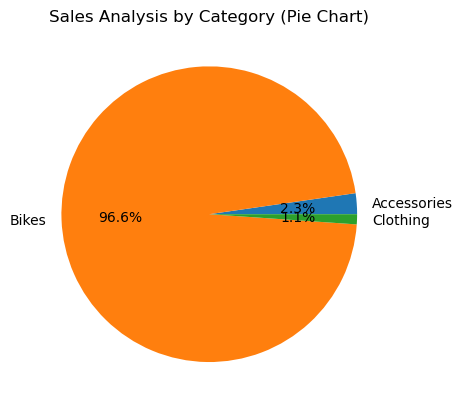

In [43]:
import matplotlib.pyplot as plt

# Extract data from sales_category
plt.pie(sales_amounts, labels=categories, autopct="%1.1f%%")
plt.title("Sales Analysis by Category (Pie Chart)")
plt.show()


# 96.6% sales are from Bikes

# sales Analysis by subcategory

In [46]:
subcategory_sales = df.groupby('SubCategory')['SalesAmount'].sum()

subcategory_label = subcategory_sales.index.to_numpy()
subcat_sales_amnt = subcategory_sales.to_numpy()

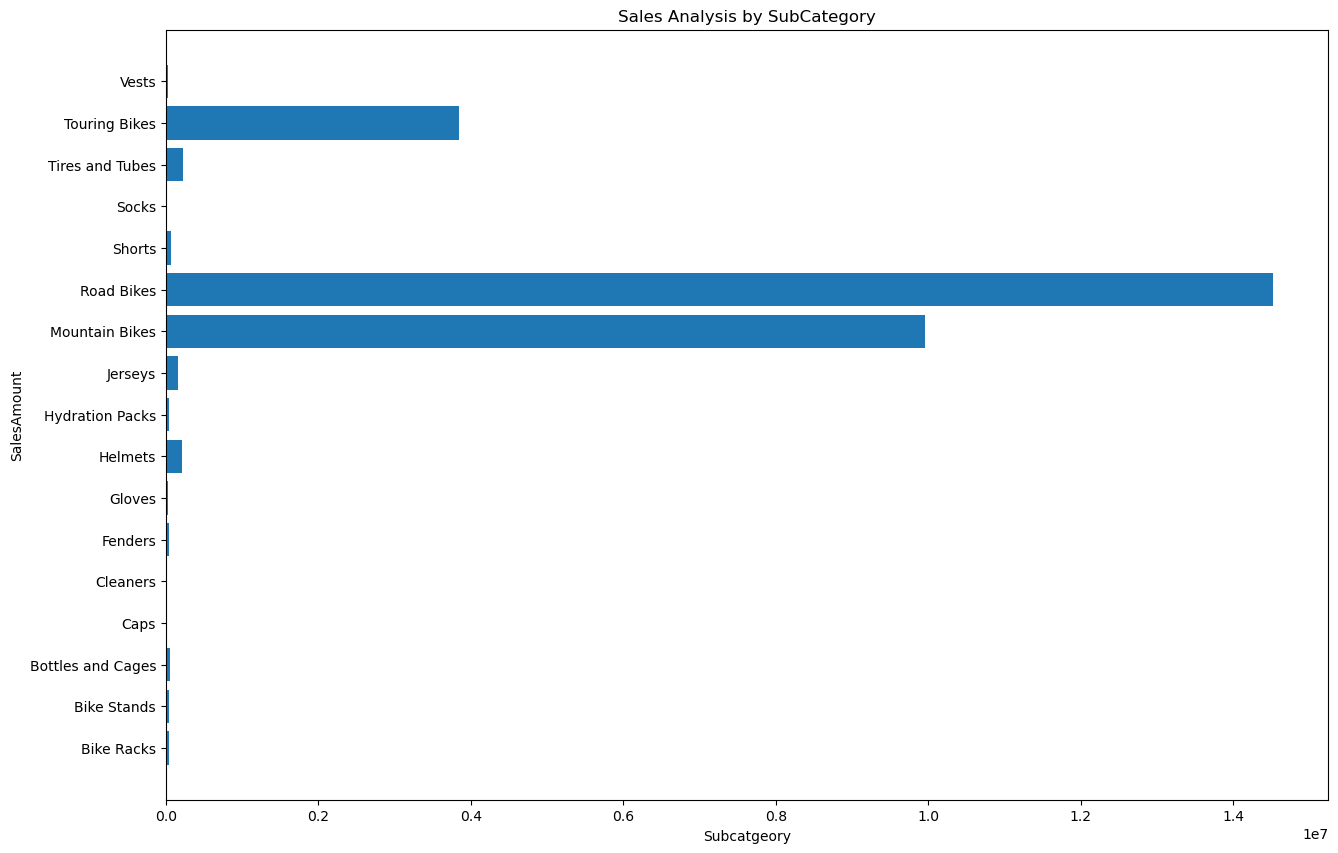

In [47]:
plt.figure(figsize=(15,10))
plt.barh(subcategory_label, subcat_sales_amnt)
plt.xlabel('Subcatgeory')
plt.ylabel('SalesAmount')
plt.title("Sales Analysis by SubCategory")
plt.show()

<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='sales_day_name', ylabel='count'>

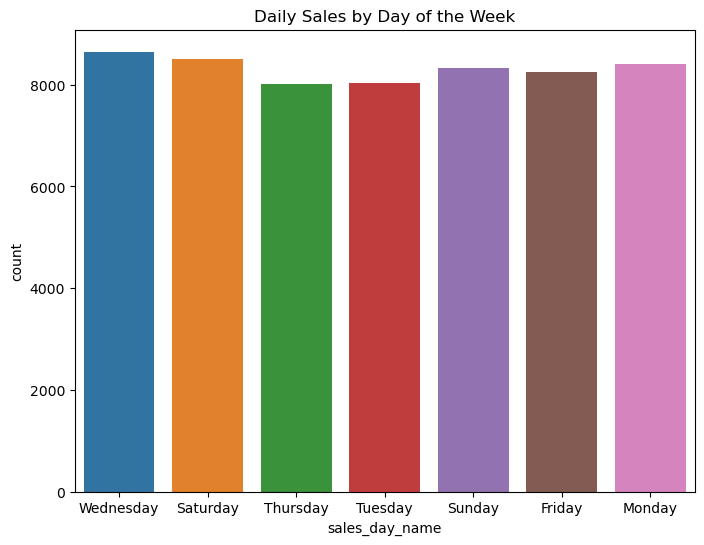

In [48]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['sales_day_name'])

United States     20524
Australia         12972
Canada             7142
United Kingdom     6709
Germany            5460
France             5382
Name: Country, dtype: int64

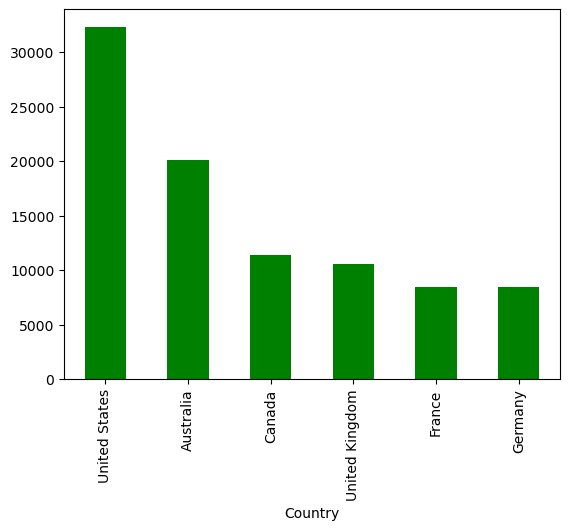

In [49]:
country_order = df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_order.plot(kind='bar', color='green');
df['Country'].value_counts()

United States     20524
Australia         12972
Canada             7142
United Kingdom     6709
Germany            5460
France             5382
Name: Country, dtype: int64

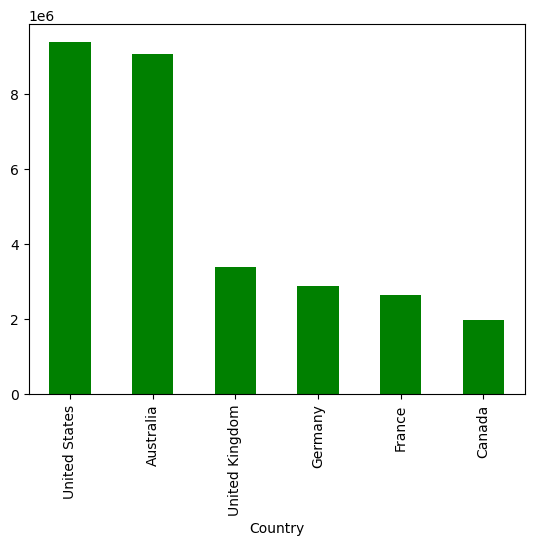

In [50]:
max_country_sales = df.groupby('Country')['SalesAmount'].sum().sort_values(ascending=False)
max_country_sales.plot(kind='bar', color='green');
df['Country'].value_counts()

# maximum sales year

              SalesAmount
sales_month              
1            1.860422e+06
2            1.899607e+06
3            1.834668e+06
4            2.009169e+06
5            2.076070e+06
6            3.064630e+06
7            2.375857e+06
8            2.502387e+06
9            2.610615e+06
10           2.778842e+06
11           3.114646e+06
12           3.180924e+06


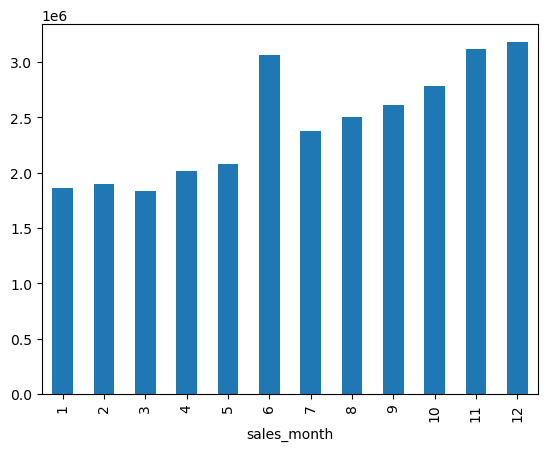

In [52]:
df.groupby('sales_month')['SalesAmount'].sum().plot(kind = 'bar')
df['sales_month'].value_counts()
sales_by_year = df.pivot_table(values='SalesAmount', index= 'sales_month',aggfunc= sum)

print(sales_by_year)

max sales in the year - 2016

             SalesAmount
sales_year              
2014        7.072084e+06
2015        5.762134e+06
2016        1.647362e+07


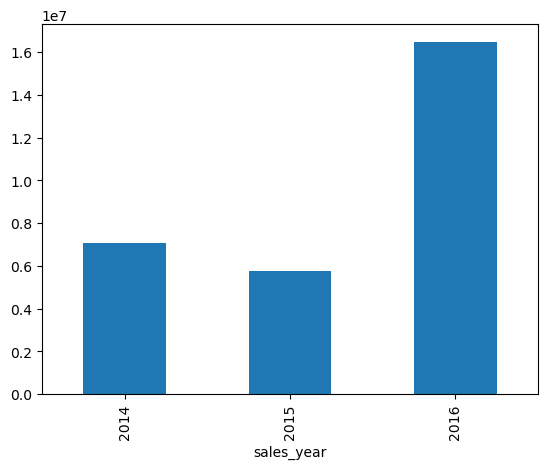

In [54]:
df.groupby('sales_year')['SalesAmount'].sum().plot(kind = 'bar')
df['sales_year'].value_counts()
sales_by_year = df.pivot_table(values='SalesAmount', index= 'sales_year',aggfunc= sum)

print(sales_by_year)

# Frequently sold product

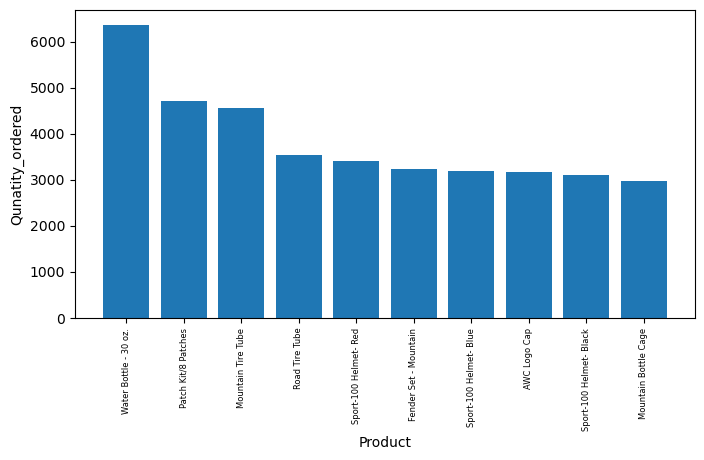

In [56]:
prd_grp_qty = df.groupby('ProductName')['OrderQuantity'].sum().sort_values(ascending=False)[:10]
prd_grp_qty
products = prd_grp_qty.index.to_list()
quantity_ordered = prd_grp_qty.to_numpy()

plt.figure(figsize=(8,4))
plt.bar(products,quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Qunatity_ordered')
plt.xticks(rotation = 'vertical', size=6)
plt.show()



# profit analysis

### profit by region

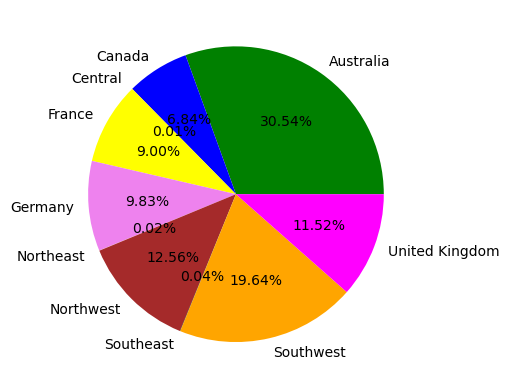

In [59]:
profit_region = df.groupby('Region')['profit'].sum()

pr_rg_label = profit_region.index
pr_rg_label

colors = ['green','blue','red','yellow','violet','pink','brown','black','orange','magenta']



plt.pie(profit_region,labels= pr_rg_label,autopct='%.2f%%',colors = colors)
plt.show()

### profit by category

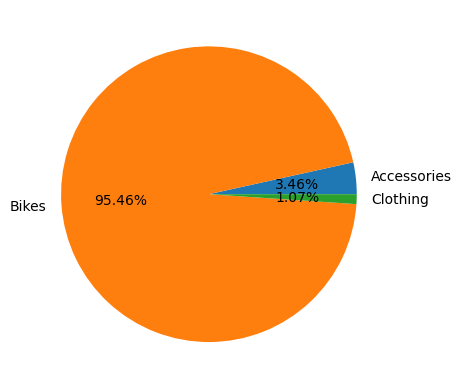

In [61]:
categ_profit = df.groupby('Category')['profit'].sum()

categ_prf_values = categ_profit.to_numpy()

pr_ct_label = categ_profit.index
pr_ct_label

plt.pie(categ_profit,labels= pr_ct_label,autopct='%.2f%%')
plt.show()

### profit by Subcategory

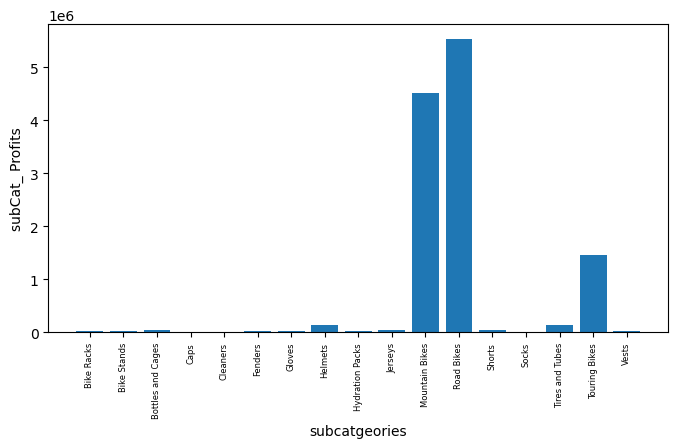

In [63]:
subcat_profit = df.groupby('SubCategory')['profit'].sum()

sub_catg = subcat_profit.index.to_list()

sub_cat_profit = subcat_profit.to_numpy()

plt.figure(figsize=(8,4))
plt.bar(sub_catg,sub_cat_profit)
plt.xlabel('subcatgeories')
plt.ylabel('subCat_ Profits')
plt.xticks(rotation = 'vertical', size=6)
plt.show()


In [64]:
cat_subcat_qty = df.groupby(['sales_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
cat_subcat_qty = cat_subcat_qty.sort_values(['sales_year', 'Category'], ascending=True)
cat_subcat_qty.style.bar(subset=['OrderQuantity'], color='violet')

In [65]:
country_sales = pd.DataFrame(df.groupby('Country').sum()[['SalesAmount', 'profit']])
country_sales.reset_index(inplace=True)


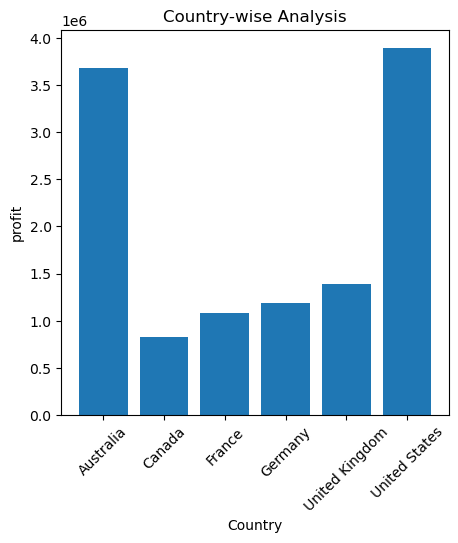

In [66]:
country_sales = df.groupby('Country')[['SalesAmount','profit']].sum().reset_index()

x_axis_data = country_sales['profit']

countries = country_sales['Country']

plt.figure(figsize=(5, 5))  
plt.bar(countries, x_axis_data)

plt.xlabel('Country')
plt.ylabel(x_axis_data.name)
plt.title('Country-wise Analysis')
plt.xticks(rotation=45)  # Rotate country labels for readability (optional)

plt.show()



### Sales based on yearly income

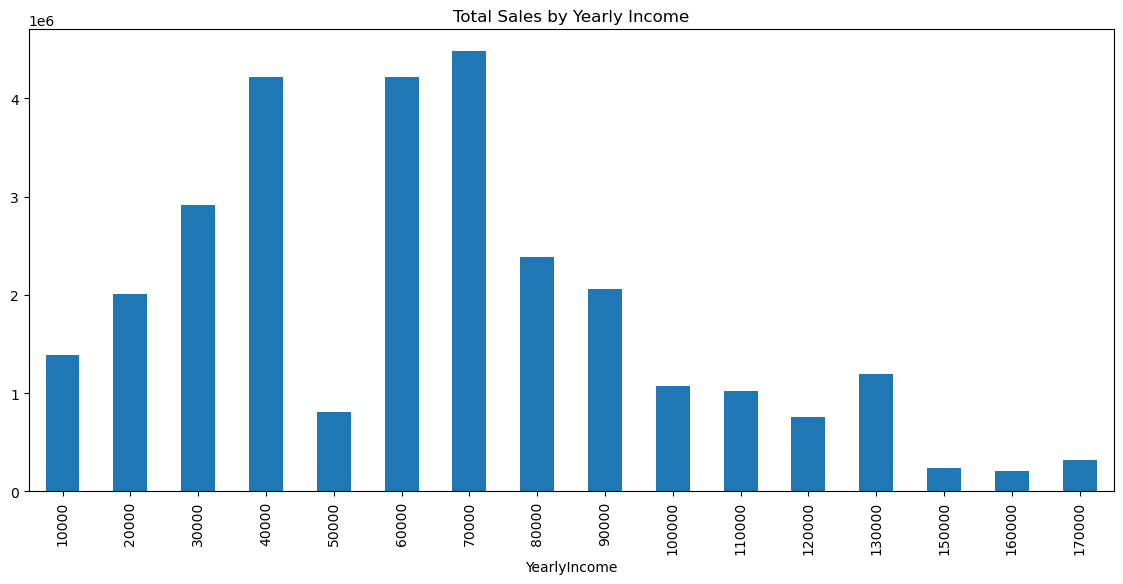

In [68]:
sale_income = df.groupby('YearlyIncome')['SalesAmount'].sum()
plt.figure(figsize=(14,6))
sale_income.plot(kind= 'bar')
plt.title('Total Sales by Yearly Income')
plt.show()

### most customers are with a annual income of range between 35000- 80000

# profit based on year, category, subcategory

In [71]:
ycs_profit = df.groupby(['sales_year','Category','SubCategory'])['profit'].sum().to_frame().sort_values(['sales_year', 'Category'], ascending=True)

ycs_profit.style.bar(subset=['profit'], color='red')

In [72]:
df.columns

Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost_x',
       'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price',
       'DateKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost_y',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate', 'FirstName', 'LastName',
       'FullName', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1',
       'DateFirstPurchase', 'CommuteDistance', 'Region', 'Country', 'Group',
       'RegionImage', 'sales_year', 'sale

# highest profit month

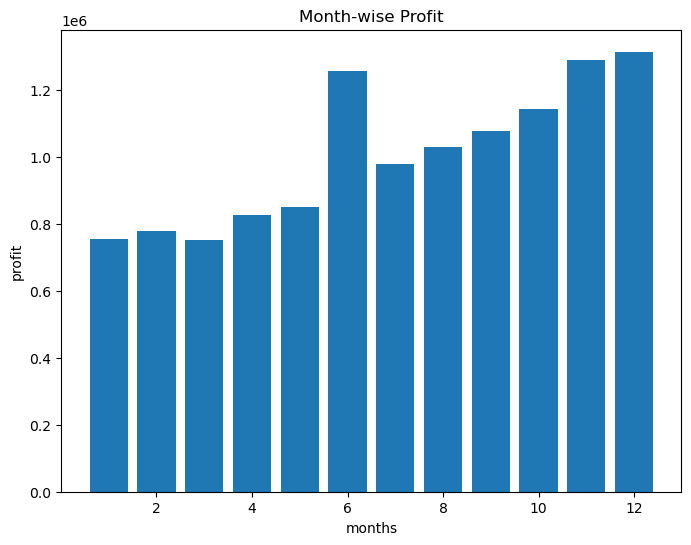

In [74]:
high_month = df.groupby('sales_month')[['SalesAmount','profit']].sum().reset_index()
high_month

y_axis_data = high_month['profit']

months = high_month['sales_month']

plt.figure(figsize=(8, 6))  
plt.bar(months, y_axis_data)

plt.xlabel('months')
plt.ylabel(y_axis_data.name)
plt.title('Month-wise Profit')
plt.xticks() 

plt.show()

### june, november and december are high profit months

## Difference in shipping date

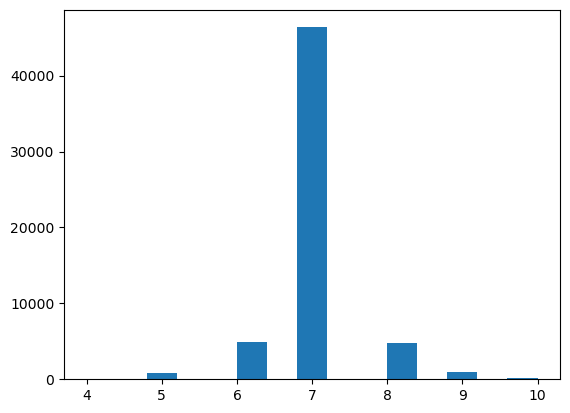

In [77]:
df['time_diff'] = (df['ShipDate']-df['OrderDate']).dt.days
df['time_diff']

plt.hist(df['time_diff'],bins = 15)
plt.show()

### The max shipping day is 7 ( need to be reduced)

# Gender contribution

In [80]:
Gender = df['Gender'].value_counts()
Marital_status = df['MaritalStatus'].value_counts()
Total_children = df['TotalChildren'].value_counts()


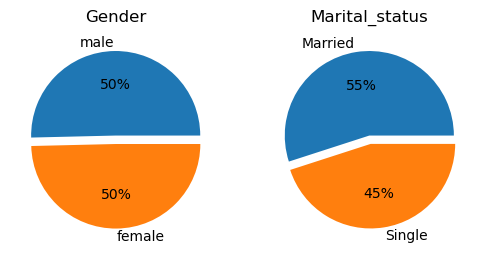

In [81]:
figure,(ax1,ax2) = plt.subplots(ncols = 2, figsize=(6,6))
ax1.set_title('Gender')
ax1.pie(Gender,labels=['male','female'],autopct= '%0.0f%%',explode=[0,0.1])
ax2.set_title('Marital_status')
ax2.pie(Marital_status,labels=['Married','Single'],autopct= '%0.0f%%',explode=[0,0.1])
plt.show()

In [82]:
male = df[df['Gender']=="M"]
female = df[df['Gender']=="F"]

In [83]:
male_qty = male.groupby(['ProductName'],as_index = False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity')
print(male_qty)

               ProductName  OrderQuantity
126  Water Bottle - 30 oz.           3169
52     Patch Kit/8 Patches           2475
23      Mountain Tire Tube           2301
56          Road Tire Tube           1853
101  Sport-100 Helmet- Red           1712


In [84]:
female_qty = female.groupby(['ProductName'],as_index = False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity')
print(female_qty)

               ProductName  OrderQuantity
126  Water Bottle - 30 oz.           3201
23      Mountain Tire Tube           2250
52     Patch Kit/8 Patches           2230
56          Road Tire Tube           1691
101  Sport-100 Helmet- Red           1686


### both male and female spent in more on water bottle. Also patch kit and Moutain tire tubes are spent more by both.

# Sales by marital_status

Text(0.5, 1.0, 'Sales By Marital_status')

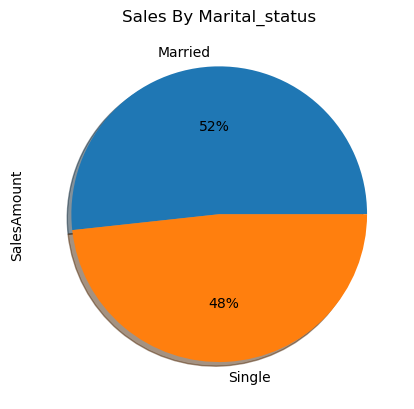

In [87]:
sales_marital_status = df.groupby('MaritalStatus')['SalesAmount'].sum()
sales_marital_status.plot(kind = 'pie',autopct = '%0.0f%%',shadow = True,labels=['Married','Single'])
plt.title('Sales By Marital_status')

In [88]:
df_corr = df.groupby(['Education','Occupation'])['SalesAmount'].mean().unstack()
df_corr

Occupation,Clerical,Management,Manual,Professional,Skilled Manual
Education,,,,,
Bachelors,642.866782,487.529334,305.692930,608.107199,548.885922
Graduate Degree,600.557692,583.305547,428.635751,554.405857,388.733184
High School,361.076123,614.041855,455.001337,480.966678,421.658041
Partial College,475.171784,570.685875,486.295431,455.416233,516.953521
Partial High School,228.321334,480.813028,311.743662,795.932165,368.178826


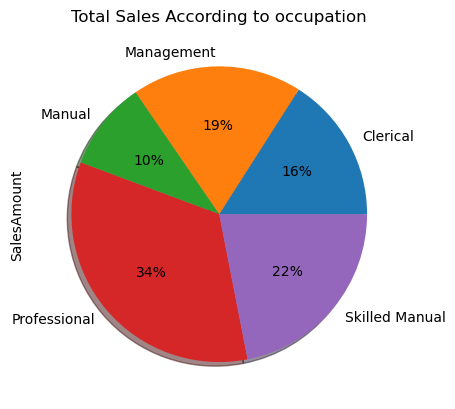

In [89]:
sales_occupation = df.groupby('Occupation')['SalesAmount'].sum()
sales_occupation.plot(kind='pie',autopct = '%0.0f%%',shadow = True)
plt.title('Total Sales According to occupation')
plt.show()

### the customers with professional level occupation are the big customers

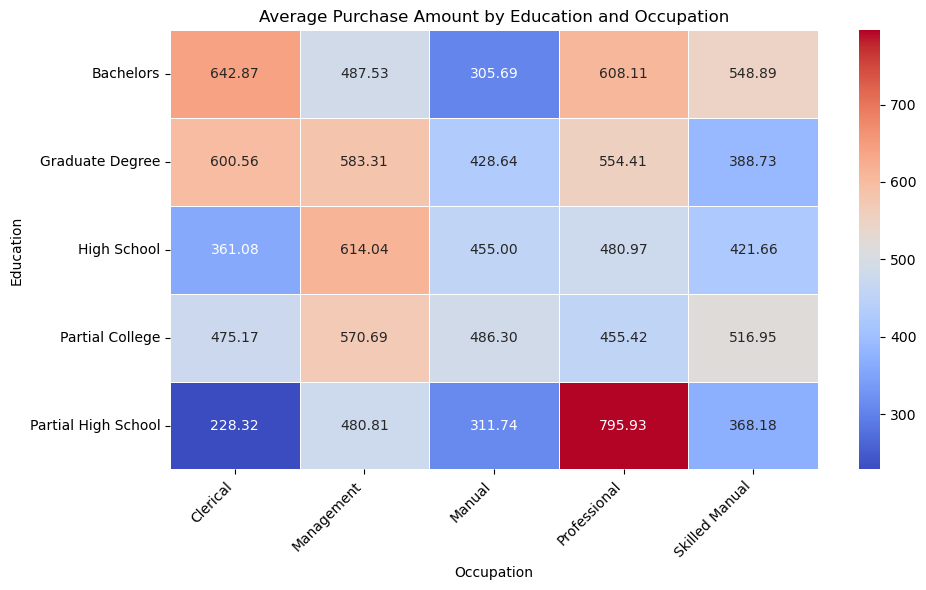

In [91]:

df_average_purchase = (
    df.groupby(["Education", "Occupation"])["SalesAmount"].mean().unstack()
)

# Create a heatmap using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_average_purchase,ax=ax,cmap="coolwarm",annot=True,  fmt=".2f",  linewidths=0.5)

# Customize the plot
ax.set_xlabel("Occupation")
ax.set_ylabel("Education")
ax.set_title("Average Purchase Amount by Education and Occupation")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## No of children and purchase

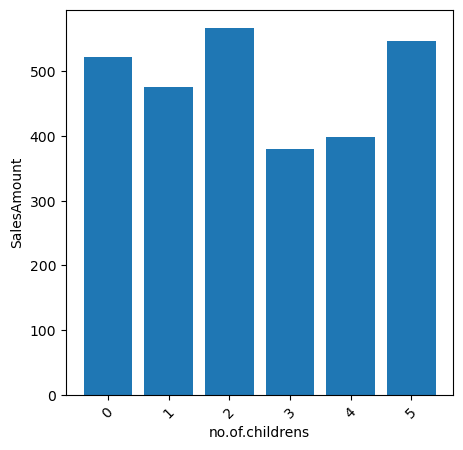

In [93]:
ch_purchase = df.groupby(['NumberChildrenAtHome'])['SalesAmount'].mean().to_frame()
ch_purchase.reset_index(inplace=True)

y_axis_data = ch_purchase['SalesAmount']

x_axis = ch_purchase['NumberChildrenAtHome']

plt.figure(figsize=(5, 5))  
plt.bar(x_axis, y_axis_data)

plt.xlabel('no.of.childrens')
plt.ylabel(y_axis_data.name)
plt.xticks(rotation=45)  # Rotate country labels for readability (optional)

plt.show()

## groupin the age category

In [95]:
from datetime import datetime


In [96]:
df['BirthDate']

0       1946-08-22
1       1946-08-22
2       1973-06-24
3       1973-06-24
4       1973-06-24
           ...    
58184   1976-01-22
58185   1976-01-22
58186   1976-01-22
58187   1957-06-06
58188   1957-06-06
Name: BirthDate, Length: 58189, dtype: datetime64[ns]

In [97]:
current_date = pd.to_datetime(datetime.now())
df['Age'] = (current_date - df['BirthDate']).astype('<m8[Y]')
df['Age']

0        77.0
1        77.0
2        50.0
3        50.0
4        50.0
         ... 
58184    48.0
58185    48.0
58186    48.0
58187    66.0
58188    66.0
Name: Age, Length: 58189, dtype: float64

In [98]:
def age(years):
    if years < 20:
        return 'Teen'
    elif years > 20 and years <40:
        return 'Young'
    elif years >40 and years < 60:
        return 'Adult'
    else:
        return 'Old'
    


In [99]:
df.head(3)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost_x,List Price,Unnamed: 22,diif std cost,diff list price,DateKey,ProductName,SubCategory,Category,StandardCost_y,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage,sales_year,sales_month,sales_day,sales_week,sales_day_name,year_month,total_invoice_amnt,profit,time_diff,Age
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,NaN,NaN,3578.27,0.0,NaN,-764.3184,NaN,2171.2942,3578.27,NaN,0,0,2014-01-01,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3864.5316,1406.9758,7,77.0
1,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,294.5797,539.99,43.1992,NaN,NaN,539.99,0.0,NaN,245.4103,NaN,294.5797,539.99,NaN,0,0,2016-04-16,Mountain-500 Black- 52,Mountain Bikes,Bikes,294.5797,Black,539.99,4,Mountain,Mountain-500,http://www.avising.com/me/LearnPBI/DataSources...,"Suitable for any type of riding, on or off-roa...",2007-07-01,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2016,4,16,5,Saturday,2016-04,583.1892,245.4103,7,77.0
2,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,NaN,NaN,3578.27,0.0,NaN,-5106.9068,NaN,2171.2942,3578.27,NaN,0,0,2014-01-30,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,30,3,Thursday,2014-01,3864.5316,1406.9758,7,50.0


In [100]:
df.loc[1,'Age']

77.0

In [101]:
x_age = df.loc[1,'Age']
age(x_age)
df['Age_category']= df['Age'].apply(age)
df['Age_category']

0          Old
1          Old
2        Adult
3        Adult
4        Adult
         ...  
58184    Adult
58185    Adult
58186    Adult
58187      Old
58188      Old
Name: Age_category, Length: 58189, dtype: object

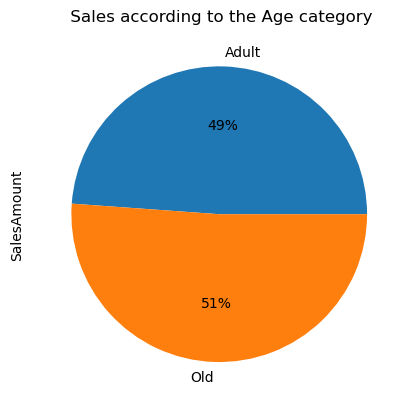

In [102]:
age_sales_category = df.groupby('Age_category')['SalesAmount'].sum()
age_sales_category.plot(kind = 'pie',autopct = '%0.0f%%',labels=['Adult','Old','Teen'])
plt.title(' Sales according to the Age category')
plt.show()

### This shows that the amount spent by the Adult and old customers are almost equal. The Teen and young customers have no contributions in sales.

# RFM Analysis

In [105]:
df_recency = df.groupby(by= 'FullName',as_index = False)['OrderDate'].max()
df_recency.columns = ['CustomerName','LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,"Adams, Aaron",2016-04-30,244
1,"Adams, Adam",2016-12-15,15
2,"Adams, Alex",2016-08-26,126
3,"Adams, Alexandra",2014-07-03,911
4,"Adams, Allison",2016-10-08,83


## Frequency

In [107]:
freq_df = df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
freq_df.columns = ['CustomerName', 'Frequency']
freq_df.head()

,CustomerName,Frequency
0,"Adams, Aaron",4
1,"Adams, Adam",2
2,"Adams, Alex",2
3,"Adams, Alexandra",1
4,"Adams, Allison",3


## Monetary Value

In [109]:
df['Total'] = df['SalesAmount']*df['OrderQuantity']
monetary_df = df.groupby(by='FullName', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,"Adams, Aaron",117.96
1,"Adams, Adam",141.98
2,"Adams, Alex",1735.98
3,"Adams, Alexandra",3578.27
4,"Adams, Allison",1602.47


In [110]:
rf_df = df_recency.merge(freq_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,"Adams, Aaron",244,4,117.96
1,"Adams, Adam",15,2,141.98
2,"Adams, Alex",126,2,1735.98
3,"Adams, Alexandra",911,1,3578.27
4,"Adams, Allison",83,3,1602.47


## CUSTOMER RANKING - RFM

In [112]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,"Adams, Aaron",244,4,117.96,23.629474,73.803117,73.803117
1,"Adams, Adam",15,2,141.98,93.757193,27.304070,27.304070
2,"Adams, Alex",126,2,1735.98,55.918596,27.304070,27.304070
3,"Adams, Alexandra",911,1,3578.27,1.004912,6.802893,6.802893
4,"Adams, Allison",83,3,1602.47,68.861754,53.534589,53.534589


##  RFM SCORE

In [114]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,"Adams, Aaron",3.31
1,"Adams, Adam",1.86
2,"Adams, Alex",1.58
3,"Adams, Alexandra",0.30
4,"Adams, Allison",2.79
5,"Adams, Amanda",4.32
6,"Adams, Amber",4.19


In [115]:
#Rating Customer based upon the RFM score
#rfm score >4.5 : Top Customer
#4.5 > rfm score > 4 : High Value Customer
#4>rfm score >3 : Medium value customer
#3>rfm score>1.6 : Low-value customer
#rfm score<1.6 :Lost Customer

In [116]:
rfm_df['Customer_segment'] = np.where(rfm_df['RFM_Score'] >4.5, "Top Customers",(np.where(rfm_df['RFM_Score'] > 4,"High value Customer",
                                        (np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",
                                                  np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head()

,CustomerName,RFM_Score,Customer_segment
0,"Adams, Aaron",3.31,Medium Value Customer
1,"Adams, Adam",1.86,Low Value Customers
2,"Adams, Alex",1.58,Lost Customers
3,"Adams, Alexandra",0.30,Lost Customers
4,"Adams, Allison",2.79,Low Value Customers


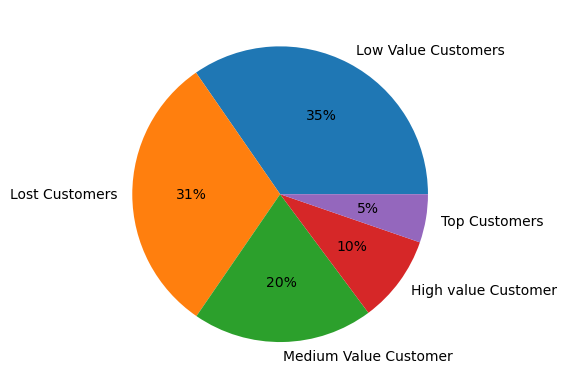

In [117]:
plt.pie(rfm_df.Customer_segment.value_counts(),labels=rfm_df.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()

### Top customers - 5%    # high value customers - 10%  Medium Value - 20% lost and low value customers - 66%

In [119]:
rfm_df.rename(columns={'CustomerName': 'FullName'}, inplace=True)
rfm_df
df_final = pd.concat([rfm_df, df], axis="columns")
df_final

,FullName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,StandardCost_x,List Price,Unnamed: 22,diif std cost,diff list price,DateKey,ProductName,SubCategory,Category,StandardCost_y,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,Region,Country,Group,RegionImage,sales_year,sales_month,sales_day,sales_week,sales_day_name,year_month,total_invoice_amnt,profit,time_diff,Age,Age_category,Total
0,"Adams, Aaron",244.0,4.0,117.96,23.63,73.80,73.80,3.31,Medium Value Customer,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,NaN,NaN,3578.27,0.0,NaN,-764.3184,NaN,2171.2942,3578.27,NaN,0,0,2014-01-01,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,1,2,Wednesday,2014-01,3864.5316,1406.9758,7,77.0,Old,7156.54
1,"Adams, Adam",15.0,2.0,141.98,93.76,27.30,27.30,1.86,Low Value Customers,600,2016-04-16,2016-04-23,21768,1,6,SO56212,1,1,539.9900,294.5797,539.99,43.1992,NaN,NaN,539.99,0.0,NaN,245.4103,NaN,294.5797,539.99,NaN,0,0,2016-04-16,Mountain-500 Black- 52,Mountain Bikes,Bikes,294.5797,Black,539.99,4,Mountain,Mountain-500,http://www.avising.com/me/LearnPBI/DataSources...,"Suitable for any type of riding, on or off-roa...",2007-07-01,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2016,4,16,5,Saturday,2016-04,583.1892,245.4103,7,77.0,Old,539.99
2,"Adams, Alex",126.0,2.0,1735.98,55.92,27.30,27.30,1.58,Lost Customers,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,NaN,NaN,3578.27,0.0,NaN,-5106.9068,NaN,2171.2942,3578.27,NaN,0,0,2014-01-30,Road-150 Red- 62,Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2014,1,30,3,Thursday,2014-01,3864.5316,1406.9758,7,50.0,Adult,14313.08
3,"Adams, Alexandra",911.0,1.0,3578.27,1.00,6.80,6.80,0.30,Lost Customers,479,2016-11-29,2016-12-05,21727,1,6,SO71614,2,1,8.9900,3.3623,8.99,0.7192,NaN,NaN,8.99,0.0,NaN,5.6277,NaN,3.3623,8.99,NaN,0,0,2016-11-29,Road Bottle Cage,Bottles and Cages,Accessories,3.3623,NaN,8.99,0,Road,Road Bottle Cage,http://www.avising.com/me/LearnPBI/DataSources...,Aluminum cage is lighter than our mountain ver...,2007-07-01,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...,2016,11,29,1,Tuesday,2016-11,9.7092,5.6277,6,50.0,Adult,8.99
4,"Adams, Allison",83.0,3.0,1602.47,68.86,53.53,53.53,2.79,Low Value Customers,477,2016-11-29,2016-12-05,21727,1,6,SO71614,3,1,4.9900,1.8663,4.99,0.3992,NaN,NaN,4.99,0.0,NaN,3.1237,NaN,1.8663,4.99,NaN,0,0,2016-11-29,Water Bottle - 30 oz.,Bottles and Cages,Accessories,1.8663,NaN,4.99,0,Sport,Water Bottle,http://www.avising

In [120]:
sales_profit_seg = df_final.groupby('Customer_segment').agg({'SalesAmount': 'sum', 'profit': 'sum'}).reset_index()
sales_profit_seg

,Customer_segment,SalesAmount,profit
0,High value Customer,1.049503e+06,4.309356e+05
1,Lost Customers,3.279156e+06,1.336573e+06
2,Low Value Customers,3.776707e+06,1.542798e+06
3,Medium Value Customer,2.111269e+06,8.651356e+05
4,Top Customers,5.668184e+05,2.322591e+05


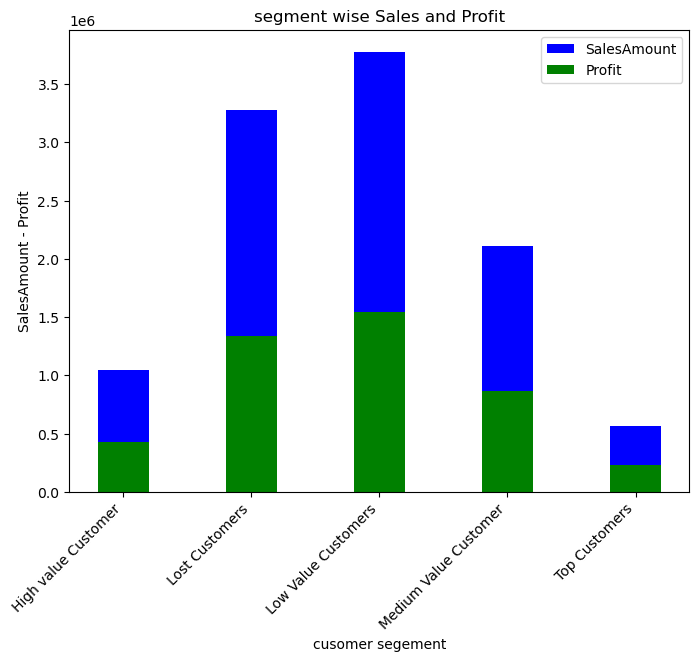

In [121]:
y_axs = sales_profit_seg['SalesAmount']
y2_axs = sales_profit_seg['profit']

x_axs = sales_profit_seg['Customer_segment']

plt.figure(figsize=(8, 6))  

plt.bar(x_axs, y_axs,color = 'blue',width= 0.4,label= 'SalesAmount')
plt.bar(x_axs, y2_axs,color = 'green',width=0.4,label = 'Profit')


plt.xlabel('cusomer segement')
plt.ylabel('SalesAmount - Profit')
plt.title('segment wise Sales and Profit')
plt.xticks(rotation = 45, ha= 'right') 
plt.legend()


plt.show()

In [122]:
sales_pr_seg = df_final.groupby('Customer_segment').agg({'SalesAmount': 'sum', 'profit': 'sum'}).reset_index()
sales_pr_seg['Sales_to_Profit_Ratio'] = sales_pr_seg['SalesAmount'] / sales_pr_seg['profit']
print(sales_pr_seg[['Customer_segment', 'Sales_to_Profit_Ratio']])

        Customer_segment  Sales_to_Profit_Ratio
0    High value Customer               2.435406
1         Lost Customers               2.453406
2    Low Value Customers               2.447959
3  Medium Value Customer               2.440391
4          Top Customers               2.440457
